In [1]:
import numpy as np
from scipy.stats import zscore
import pandas as pd

# from dredFISH.Utils.config_plots import *
from dredFISH.Utils import basicu
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
f1 = "./data/rna/combatseq_2cluster_DE_50pct_above_2cpm.csv"
f2 = "./data/rna/combatseq_3cluster_DE_all_above_2cpm.csv"
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)

In [3]:
df1['cluster'].unique(), df2['cluster'].unique()

(array([2, 1]), array([5, 3, 1, 2, 4]))

In [4]:
d1 = df1.set_index('name').filter(regex=r'^X').copy()
d2 = df2.set_index('name').filter(regex=r'^X').copy()
samples = np.sort(d1.columns)
# d1 = d1[samples]
# d2 = d2[samples]

In [5]:
xchrom_genes = df1.loc[df1['chr']=='X', 'name'].values
xchrom_genes

array(['Cldn2', 'P2ry10', 'Zfp185', 'Nup62cl', 'Tenm1', 'Frmpd4',
       'Zcchc18', 'Fndc3c1', 'Gpm6b', 'Gdpd2', 'Efnb1', 'Ammecr1', 'Plp2',
       'Pls3', 'C430049B03Rik', 'Fam122b', 'Pcdh19', 'Klf8', 'Msn',
       'Smarca1', 'Zfp449', 'Ap1s2', 'Dock11', 'Sh3kbp1', 'Gm14636',
       'Timp1', 'Ocrl'], dtype=object)

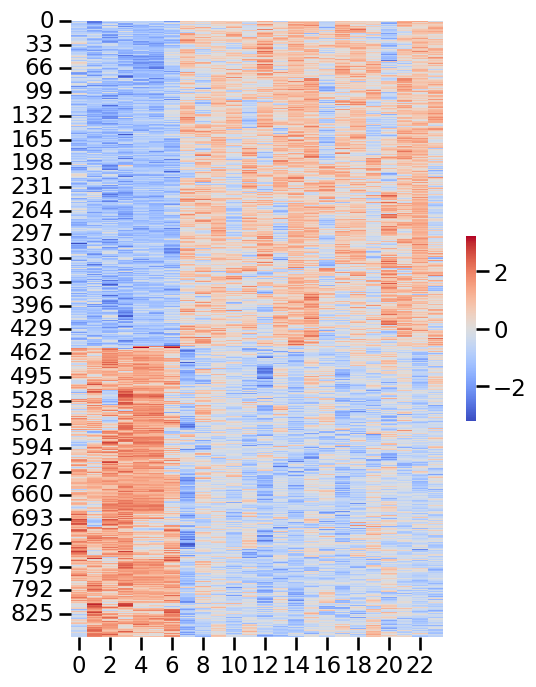

In [6]:
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(
    zscore(d1.values, axis=1), 
    cmap='coolwarm', 
    cbar_kws={'shrink': 0.3},
    ax=ax, 
    center=0,
   )
plt.show()

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


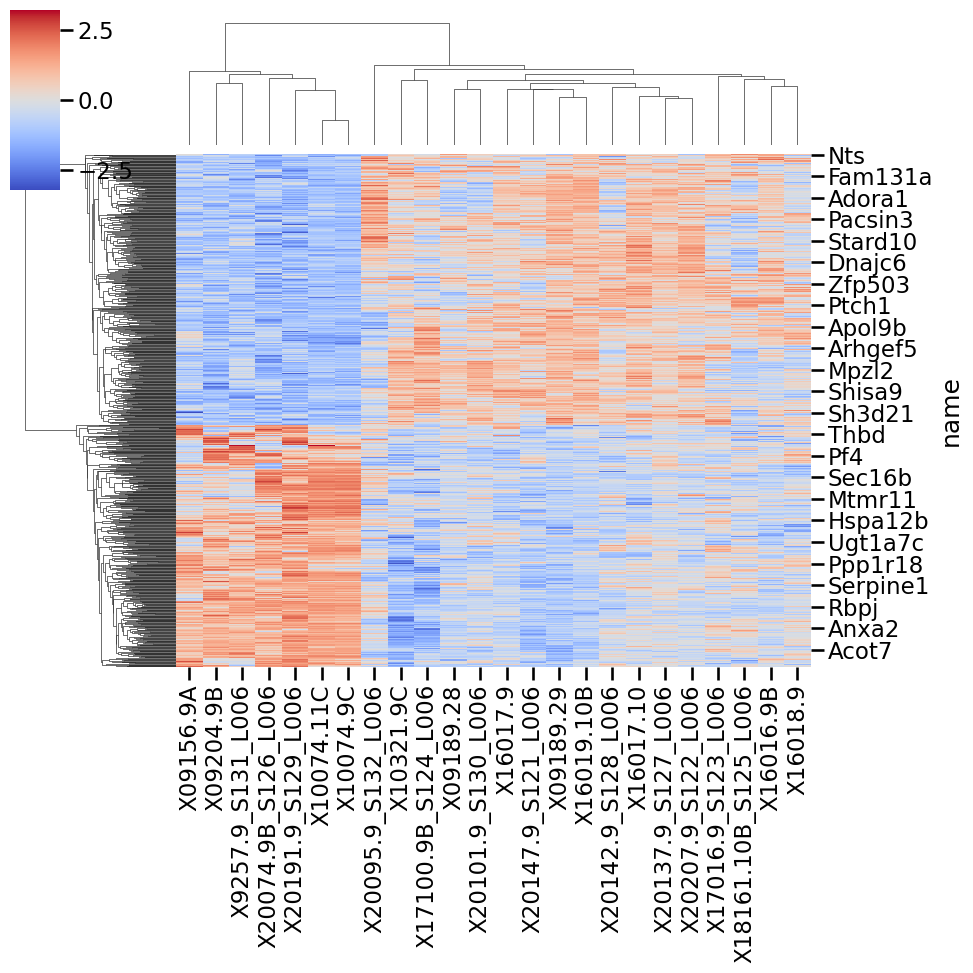

In [7]:
sns.clustermap(
    zscore(d1, axis=1), 
    xticklabels=True,
    cmap='coolwarm', 
    )

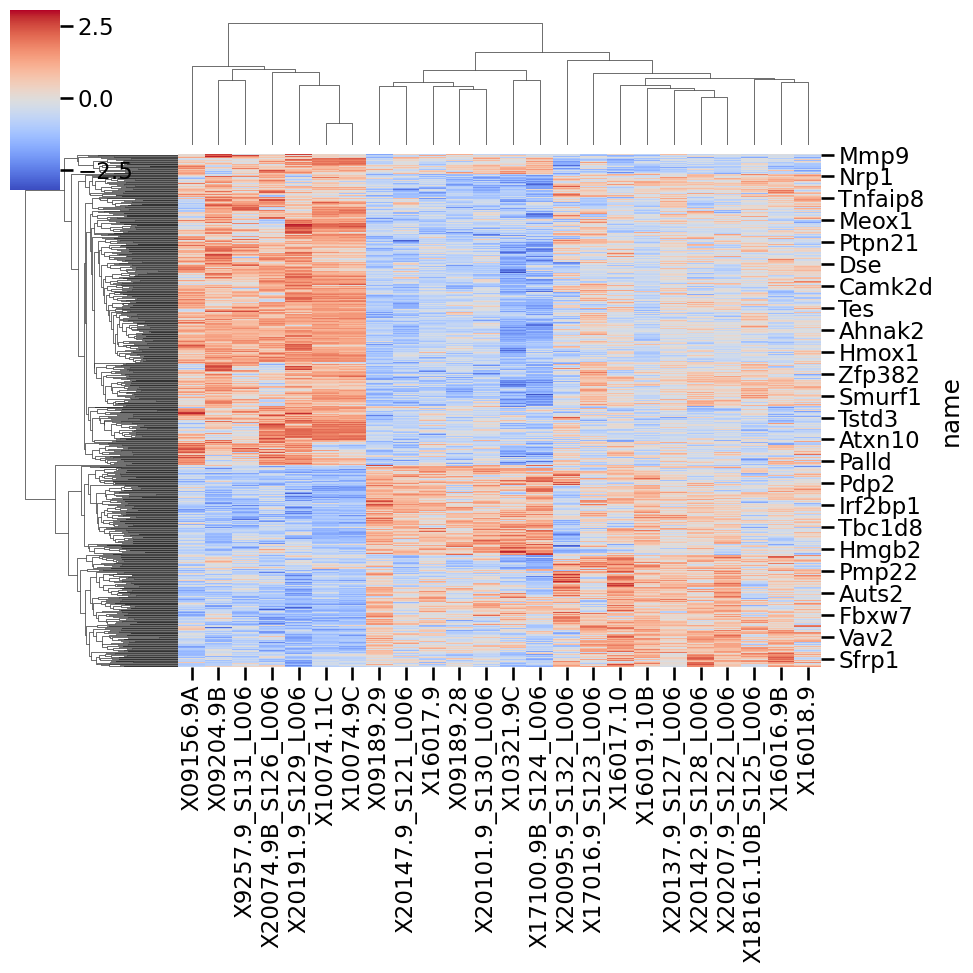

In [8]:
sns.clustermap(
    zscore(d2, axis=1), 
    xticklabels=True,
    cmap='coolwarm', 
    )

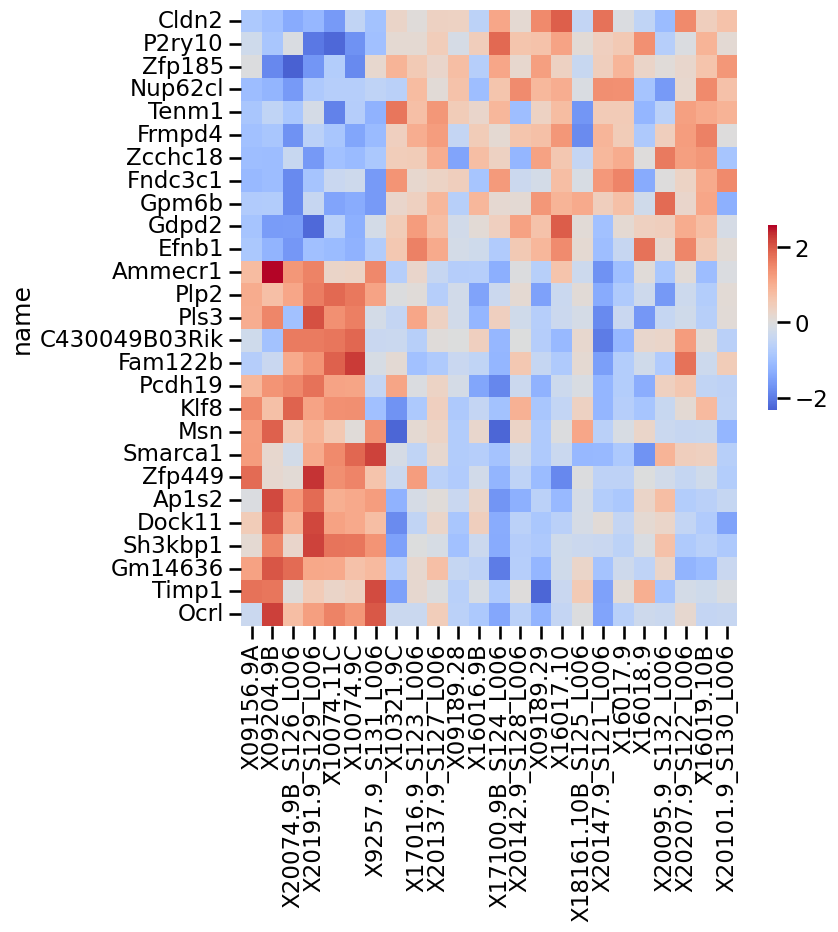

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(
    zscore(d1.loc[xchrom_genes], axis=1), 
    cmap='coolwarm', 
    cbar_kws={'shrink': 0.3},
    xticklabels=True,
    yticklabels=True,
    ax=ax, 
    center=0,
   )
plt.show()